In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir="train"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 21649 images belonging to 150 classes.


In [3]:
classes

['AFRICAN CROWNED CRANE',
 'AFRICAN FIREFINCH',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'ANHINGA',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ARARIPE MANAKIN',
 'ASIAN CRESTED IBIS',
 'BALD EAGLE',
 'BALD IBIS',
 'BALI STARLING',
 'BALTIMORE ORIOLE',
 'BANANAQUIT',
 'BANDED BROADBILL',
 'BANDED PITA',
 'BAR-TAILED GODWIT',
 'BARN OWL',
 'BARN SWALLOW',
 'BARRED PUFFBIRD',
 'BAY-BREASTED WARBLER',
 'BEARDED BARBET',
 'BEARDED BELLBIRD',
 'BEARDED REEDLING',
 'BELTED KINGFISHER',
 'BIRD OF PARADISE',
 'BLACK & YELLOW bROADBILL',
 'BLACK FRANCOLIN',
 'BLACK SKIMMER',
 'BLACK SWAN',
 'BLACK TAIL CRAKE',
 'BLACK THROATED BUSHTIT',
 'BLACK THROATED WARBLER',
 'BLACK VULTURE',
 'BLACK-CAPPED CHICKADEE',
 'BLACK-NECKED GREBE',
 'BLACK-THROATED SPARROW',
 'BLACKBURNIAM WARBLER',
 'BLONDE CRESTED WOODPECKER',
 'BLUE GROUSE',
 'BLUE HERON',
 'BOBOLINK',
 'BORNEA

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Conv2D,Dropout
from keras.layers import BatchNormalization

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(150,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 64)       

In [9]:
history = model.fit(train_ds,epochs= 15, batch_size=32)

Epoch 1/15
677/677 [==============================] - 790s 1s/step - loss: 2.1268 - accuracy: 0.4747
Epoch 2/15
677/677 [==============================] - 762s 1s/step - loss: 1.5874 - accuracy: 0.5959
Epoch 3/15
677/677 [==============================] - 784s 1s/step - loss: 1.2867 - accuracy: 0.6623
Epoch 4/15
677/677 [==============================] - 780s 1s/step - loss: 1.0874 - accuracy: 0.7069
Epoch 5/15
677/677 [==============================] - 973s 1s/step - loss: 0.9251 - accuracy: 0.7453
Epoch 6/15
677/677 [==============================] - 914s 1s/step - loss: 0.7993 - accuracy: 0.7746
Epoch 7/15
677/677 [==============================] - 918s 1s/step - loss: 0.6952 - accuracy: 0.7999
Epoch 8/15
677/677 [==============================] - 919s 1s/step - loss: 0.6205 - accuracy: 0.8179
Epoch 9/15
677/677 [==============================] - 924s 1s/step - loss: 0.5471 - accuracy: 0.8346
Epoch 10/15
677/677 [==============================] - 921s 1s/step - loss: 0.4915 - accura

In [12]:
model.save('bird.h5')

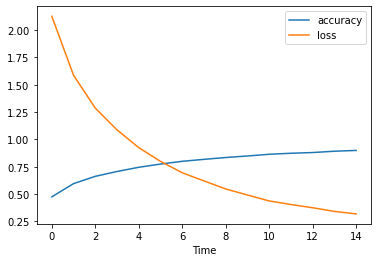

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [24]:
#import numpy library
import numpy as np
#import load_model method to load our saved model
from keras.models import load_model
#import image from keras.preprocessing
from keras.preprocessing import image
#loading our saved model file
model = load_model("bird.h5")
img = image.load_img(r"/Users/vatsal/Golden/2.jpg",target_size=(224,224))
x = image.img_to_array(img)
#expanding the shape of image to 4 dimensions
x = np.expand_dims(x,axis=0)
pred = model.predict_classes(x)
print(classes[np.argmax(pred)])

AFRICAN CROWNED CRANE
